In [105]:
# Import Library
import os
import numpy as np
import itertools

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras import regularizers, metrics
from tensorflow.keras.callbacks import EarlyStopping



In [4]:
# set file path for x-ray
#----------
# all files 
folder_path = 'data/'
# we have three folders for images dataset
set_list = ['train','test','val']

In [5]:
# replace file path for x-ray after research
test_folder = folder_path + 'val' #YOTO
train_folder = folder_path + 'train'
val_folder = folder_path + 'test'

# 1

In [9]:
# Model CNN

model64 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model64.compile(loss      = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics   = ['accuracy'])

In [11]:
#Fitting

train_datagen = ImageDataGenerator(
                    rescale         = 1./255,
                    shear_range     = 0.2,
                    zoom_range      = 0.2,
                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_folder,  
                    target_size   = (64, 64),  
                    batch_size    = 32,
                    class_mode    = 'binary')

validation_generator = test_datagen.flow_from_directory(
                    val_folder, 
                    target_size = (64, 64), 
                    batch_size  = 32, 
                    class_mode  = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
model64.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [15]:
model64_result = model64.fit(
                train_generator,
                steps_per_epoch=50,  
                epochs=10,
                validation_data=validation_generator, 
                validation_steps=5)

Epoch 1/10
50/50 [==============================] - 34s 674ms/step - loss: 0.4912 - accuracy: 0.7850 - val_loss: 0.4385 - val_accuracy: 0.8125
Epoch 2/10
50/50 [==============================] - 30s 602ms/step - loss: 0.3412 - accuracy: 0.8525 - val_loss: 0.3748 - val_accuracy: 0.8188
Epoch 3/10
50/50 [==============================] - 29s 581ms/step - loss: 0.2669 - accuracy: 0.8881 - val_loss: 0.3135 - val_accuracy: 0.8875
Epoch 4/10
50/50 [==============================] - 27s 538ms/step - loss: 0.2498 - accuracy: 0.9013 - val_loss: 0.3280 - val_accuracy: 0.8687
Epoch 5/10
50/50 [==============================] - 29s 585ms/step - loss: 0.2145 - accuracy: 0.9069 - val_loss: 0.3104 - val_accuracy: 0.8813
Epoch 6/10
50/50 [==============================] - 28s 563ms/step - loss: 0.2012 - accuracy: 0.9206 - val_loss: 0.3096 - val_accuracy: 0.8438
Epoch 7/10
50/50 [==============================] - 28s 570ms/step - loss: 0.2230 - accuracy: 0.9075 - val_loss: 0.2231 - val_accuracy: 0.8875

In [92]:
import pandas as pd
set_df = pd.DataFrame({
        'model':'model64',
        'loss':model64_result.history['loss'],
        'accuracy':model64_result.history['accuracy'],
        'val_loss':model64_result.history['val_loss'],
        'val_accuracy':model64_result.history['val_accuracy']
})

set_df

,model,loss,accuracy,val_loss,val_accuracy
0,model64,0.491186,0.785000,0.438517,0.81250
1,model64,0.341214,0.852500,0.374848,0.81875
2,model64,0.266945,0.888125,0.313499,0.88750
3,model64,0.249802,0.901250,0.327982,0.86875
4,model64,0.214520,0.906875,0.310428,0.88125
5,model64,0.201228,0.920625,0.309554,0.84375
6,model64,0.223020,0.907500,0.223148,0.88750
7,model64,0.203268,0.913125,0.705259,0.73750
8,model64,0.192901,0.920000,0.635802,0.76250
9,model64,0.210931,0.913750,0.272597,0.88125


Text(0.5, 1.0, 'Training and validation loss')

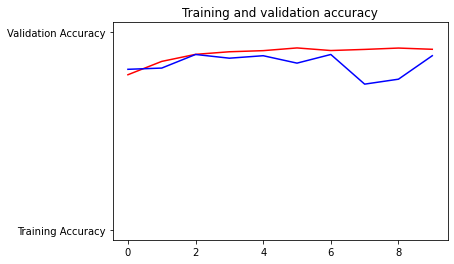

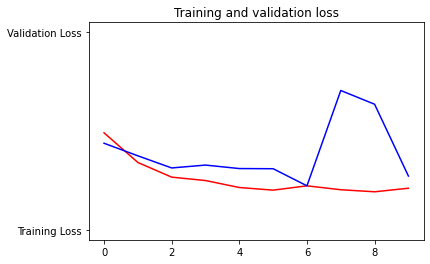

In [26]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=model64_result.history['accuracy']
val_acc=model64_result.history['val_accuracy']
loss=model64_result.history['loss']
val_loss=model64_result.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')

In [32]:
# Model CNN

model150 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model150.compile(loss      = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics   = ['accuracy'])

In [28]:
#Fitting

train_datagen = ImageDataGenerator(
                    rescale         = 1./255,
                    shear_range     = 0.2,
                    zoom_range      = 0.2,
                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_folder,  
                    target_size   = (150, 150),  
                    batch_size    = 32,
                    class_mode    = 'binary')

validation_generator = test_datagen.flow_from_directory(
                    val_folder, 
                    target_size = (150, 150), 
                    batch_size  = 32, 
                    class_mode  = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [98]:
model64.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [97]:
model150.layers

In [34]:
model150_result = model150.fit(
                train_generator,
                steps_per_epoch=50,  
                epochs=10,
                validation_data=validation_generator, 
                validation_steps=5)

Epoch 1/10
50/50 [==============================] - 49s 976ms/step - loss: 0.6660 - accuracy: 0.7138 - val_loss: 0.4681 - val_accuracy: 0.7812
Epoch 2/10
50/50 [==============================] - 49s 984ms/step - loss: 0.3294 - accuracy: 0.8600 - val_loss: 0.5219 - val_accuracy: 0.7875
Epoch 3/10
50/50 [==============================] - 48s 962ms/step - loss: 0.2634 - accuracy: 0.8906 - val_loss: 0.7242 - val_accuracy: 0.7437
Epoch 4/10
50/50 [==============================] - 45s 903ms/step - loss: 0.2503 - accuracy: 0.8963 - val_loss: 0.4196 - val_accuracy: 0.8375
Epoch 5/10
50/50 [==============================] - 45s 899ms/step - loss: 0.2593 - accuracy: 0.8981 - val_loss: 0.4504 - val_accuracy: 0.8125
Epoch 6/10
50/50 [==============================] - 45s 898ms/step - loss: 0.2260 - accuracy: 0.9044 - val_loss: 0.5693 - val_accuracy: 0.8000
Epoch 7/10
50/50 [==============================] - 46s 922ms/step - loss: 0.2088 - accuracy: 0.9162 - val_loss: 0.3169 - val_accuracy: 0.8687

In [93]:
l = set_df.shape[0]
for i in range(0,10): 
    set_df.loc[l+i]='model150', model150_result.history['loss'][i],model150_result.history['accuracy'][i],model150_result.history['val_loss'][i],model150_result.history['val_accuracy'][i]
set_df

,model,loss,accuracy,val_loss,val_accuracy
0,model64,0.491186,0.785000,0.438517,0.81250
1,model64,0.341214,0.852500,0.374848,0.81875
2,model64,0.266945,0.888125,0.313499,0.88750
3,model64,0.249802,0.901250,0.327982,0.86875
4,model64,0.214520,0.906875,0.310428,0.88125
5,model64,0.201228,0.920625,0.309554,0.84375
6,model64,0.223020,0.907500,0.223148,0.88750
7,model64,0.203268,0.913125,0.705259,0.73750
8,model64,0.192901,0.920000,0.635802,0.76250
9,model64,0.210931,0.913750,0.272597,0.88125


Text(0.5, 1.0, 'Training and validation loss')

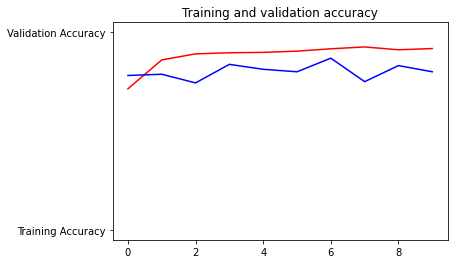

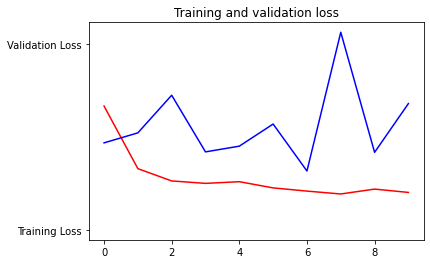

In [36]:
acc=model150_result.history['accuracy']
val_acc=model150_result.history['val_accuracy']
loss=model150_result.history['loss']
val_loss=model150_result.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')

In [40]:
# Model CNN

model224 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model224.compile(loss      = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics   = ['accuracy'])

In [38]:
#Fitting

train_datagen = ImageDataGenerator(
                    rescale         = 1./255,
                    shear_range     = 0.2,
                    zoom_range      = 0.2,
                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_folder,  
                    target_size   = (224, 224),  
                    batch_size    = 32,
                    class_mode    = 'binary')

validation_generator = test_datagen.flow_from_directory(
                    val_folder, 
                    target_size = (224, 224), 
                    batch_size  = 32, 
                    class_mode  = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [41]:
model224_result = model224.fit(
                train_generator,
                steps_per_epoch=50,  
                epochs=10,
                validation_data=validation_generator, 
                validation_steps=5)

Epoch 1/10
50/50 [==============================] - 72s 1s/step - loss: 0.7007 - accuracy: 0.7387 - val_loss: 0.4738 - val_accuracy: 0.7875
Epoch 2/10
50/50 [==============================] - 69s 1s/step - loss: 0.3126 - accuracy: 0.8719 - val_loss: 0.5231 - val_accuracy: 0.7812
Epoch 3/10
50/50 [==============================] - 70s 1s/step - loss: 0.2507 - accuracy: 0.8975 - val_loss: 0.5803 - val_accuracy: 0.8000
Epoch 4/10
50/50 [==============================] - 70s 1s/step - loss: 0.2002 - accuracy: 0.9187 - val_loss: 0.4840 - val_accuracy: 0.8562
Epoch 5/10
50/50 [==============================] - 68s 1s/step - loss: 0.2167 - accuracy: 0.9112 - val_loss: 0.5854 - val_accuracy: 0.7750
Epoch 6/10
50/50 [==============================] - 68s 1s/step - loss: 0.2333 - accuracy: 0.9050 - val_loss: 0.6276 - val_accuracy: 0.7812
Epoch 7/10
50/50 [==============================] - 70s 1s/step - loss: 0.2496 - accuracy: 0.8969 - val_loss: 0.5650 - val_accuracy: 0.7750
Epoch 8/10
50/50 [==

In [86]:
set_df.shape

(29, 5)

In [94]:
l = set_df.shape[0]
for i in range(0,10): 
    set_df.loc[l+i]='model224', model224_result.history['loss'][i],model224_result.history['accuracy'][i],model224_result.history['val_loss'][i],model224_result.history['val_accuracy'][i]
set_df 

,model,loss,accuracy,val_loss,val_accuracy
0,model64,0.491186,0.785000,0.438517,0.81250
1,model64,0.341214,0.852500,0.374848,0.81875
2,model64,0.266945,0.888125,0.313499,0.88750
3,model64,0.249802,0.901250,0.327982,0.86875
4,model64,0.214520,0.906875,0.310428,0.88125
5,model64,0.201228,0.920625,0.309554,0.84375
6,model64,0.223020,0.907500,0.223148,0.88750
7,model64,0.203268,0.913125,0.705259,0.73750
8,model64,0.192901,0.920000,0.635802,0.76250
9,model64,0.210931,0.913750,0.272597,0.88125


Text(0.5, 1.0, 'Training and validation loss')

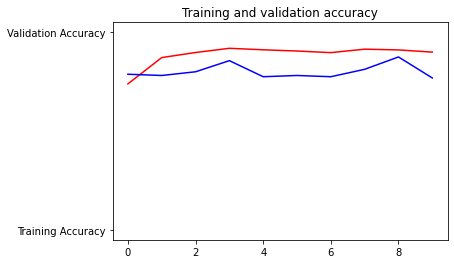

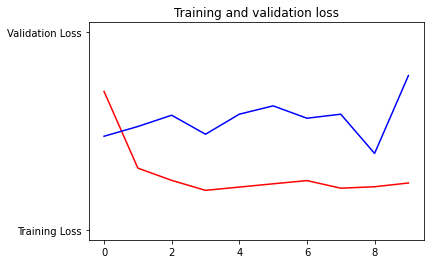

In [45]:
acc=model224_result.history['accuracy']
val_acc=model224_result.history['val_accuracy']
loss=model224_result.history['loss']
val_loss=model224_result.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')

In [46]:
# Model CNN

model256 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model256.compile(loss      = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics   = ['accuracy'])

In [47]:
#Fitting

train_datagen = ImageDataGenerator(
                    rescale         = 1./255,
                    shear_range     = 0.2,
                    zoom_range      = 0.2,
                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_folder,  
                    target_size   = (256, 256),  
                    batch_size    = 32,
                    class_mode    = 'binary')

validation_generator = test_datagen.flow_from_directory(
                    val_folder, 
                    target_size = (256, 256), 
                    batch_size  = 32, 
                    class_mode  = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [48]:
model256_result = model256.fit(
                train_generator,
                steps_per_epoch=50,  
                epochs=10,
                validation_data=validation_generator, 
                validation_steps=5)

Epoch 1/10
50/50 [==============================] - 101s 2s/step - loss: 0.8454 - accuracy: 0.7462 - val_loss: 0.4050 - val_accuracy: 0.8125
Epoch 2/10
50/50 [==============================] - 107s 2s/step - loss: 0.2819 - accuracy: 0.8825 - val_loss: 0.6476 - val_accuracy: 0.7125
Epoch 3/10
50/50 [==============================] - 116s 2s/step - loss: 0.2471 - accuracy: 0.9000 - val_loss: 0.4052 - val_accuracy: 0.8188
Epoch 4/10
50/50 [==============================] - 119s 2s/step - loss: 0.2305 - accuracy: 0.9062 - val_loss: 0.5131 - val_accuracy: 0.8000
Epoch 5/10
50/50 [==============================] - 112s 2s/step - loss: 0.2286 - accuracy: 0.9075 - val_loss: 0.4312 - val_accuracy: 0.8313
Epoch 6/10
50/50 [==============================] - 109s 2s/step - loss: 0.2368 - accuracy: 0.8956 - val_loss: 0.9943 - val_accuracy: 0.7125
Epoch 7/10
50/50 [==============================] - 85s 2s/step - loss: 0.1987 - accuracy: 0.9150 - val_loss: 0.3782 - val_accuracy: 0.8625
Epoch 8/10
50/

Text(0.5, 1.0, 'Training and validation loss')

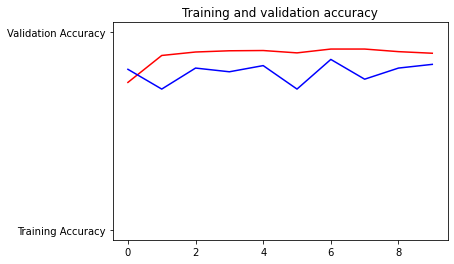

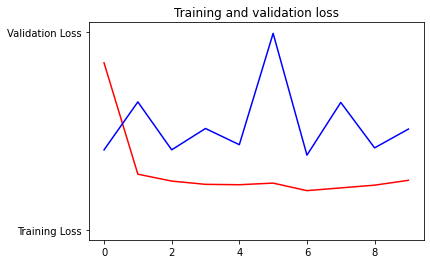

In [65]:
acc=model256_result.history['accuracy']
val_acc=model256_result.history['val_accuracy']
loss=model256_result.history['loss']
val_loss=model256_result.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')

In [95]:
l = set_df.shape[0]
for i in range(0,10): 
    set_df.loc[l+i]='model256', model256_result.history['loss'][i],model256_result.history['accuracy'][i],model256_result.history['val_loss'][i],model256_result.history['val_accuracy'][i]
set_df

,model,loss,accuracy,val_loss,val_accuracy
0,model64,0.491186,0.785000,0.438517,0.81250
1,model64,0.341214,0.852500,0.374848,0.81875
2,model64,0.266945,0.888125,0.313499,0.88750
3,model64,0.249802,0.901250,0.327982,0.86875
4,model64,0.214520,0.906875,0.310428,0.88125
5,model64,0.201228,0.920625,0.309554,0.84375
6,model64,0.223020,0.907500,0.223148,0.88750
7,model64,0.203268,0.913125,0.705259,0.73750
8,model64,0.192901,0.920000,0.635802,0.76250
9,model64,0.210931,0.913750,0.272597,0.88125


We deside to stop on 224 for image target size, it's give us better results.

In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Found 16 images belonging to 2 classes.
Confusion matrix, without normalization
[[8 0]
 [8 0]]


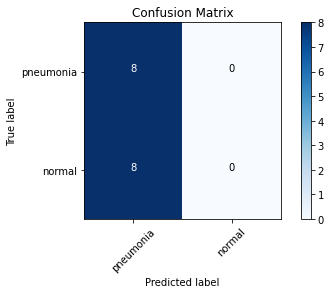

In [106]:
test_generator = test_datagen.flow_from_directory(
        directory=test_folder,
        target_size=(224, 224),
        batch_size=16,
        classes=['pneumonia','normal'])

predictions = model224.predict(x=test_generator, steps = 1, verbose=0)
cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=-1))

cm_plot_labels = ['pneumonia','normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [107]:
predictions

array([[0.9988049 ],
       [0.86907977],
       [0.126459  ],
       [0.4394078 ],
       [0.99999166],
       [0.9998379 ],
       [0.9748962 ],
       [0.9962517 ],
       [0.9801475 ],
       [0.9584701 ],
       [0.37642843],
       [0.99997795],
       [0.38290167],
       [0.00635064],
       [0.00701758],
       [0.99958575]], dtype=float32)

In [110]:
from sklearn.metrics import classification_report

print(classification_report(test_generator.classes, np.argmax(predictions, axis=-1)))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       0.00      0.00      0.00         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
